In [40]:
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.chrome.options import Options




In [41]:

class flipkart_fashion:
    def __init__(self,itemName) -> None:
        self.items=itemName
        self.pageurl=f'https://www.flipkart.com/search?q={self.items}'   
        self.pageurl2=f'https://www.flipkart.com/search?q={self.items}&page='
    cardClass = '_1xHGtK'
    nameCard='_2WkVRV'
    descriptionClass='IRpwTa'
    priceClass="_30jeq3"
    imageClass='_2r_T1I'
    hrefClass='IRpwTa'
    
class amazon:
    def __init__(self,itemName) -> None:
        self.items=itemName
        self.pageurl=f'https://www.amazon.in/s?k={self.items}&ref=nb_sb_noss_2'
        self.pageurl2=f'https://www.amazon.in/s?k={self.items}&ref=nb_sb_noss_2&page='
    cardClass='s-search-result'
    nameCard='a-size-base-plus a-color-base'
    descriptionClass='a-size-base-plus a-color-base a-text-normal'
    priceClass='a-price-whole'
    imageClass='s-image'
    hrefClass='a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'
class myntra:
    def __init__(self,itemName) -> None:
        self.items=itemName
        self.pageurl=f'https://www.myntra.com/{self.items}'
        self.pageurl2=f'https://www.myntra.com/{self.items}?p='
    cardClass='product-base'
    nameCard='product-brand'
    descriptionClass='product-product'
    priceClass='product-discountedPrice'
    imageClass='img-responsive'
    hrefClass='_blank'
    

In [42]:
itemName= 'hats'
itemName='%20'.join(itemName.strip().split())


In [43]:
keyWords=[]
itemList=[]

In [44]:
# websites = [flipkart_fashion(itemName),amazon(itemName)]
# namewebsites=['flipkart','amazon']


In [45]:
websites=[flipkart_fashion(itemName)]
namewebsites=['flipkart']

itemName ='%20'.join(input().split())


In [46]:

def setlist(item,nameCard,descriptionClass,priceClass,websitewhich,imageClass,hrefClass):
    if str(websitewhich)=='flipkart':
        name=item.find('div',class_=nameCard)
        if name == None:
            name=item.find('a',class_='IRpwTa').text
        else:
            name=name.text
        dis=item.find('a',class_=descriptionClass)['title']
        price=item.find('div',class_=priceClass).text[1:]
        price=''.join(price.split(','))
        img=item.find('img',class_=imageClass)['src']
        href=item.find('a',class_=hrefClass)['href']

        keyWords.extend(dis.split())
        return [name,dis,float(price),img,'https://www.flipkart.com'+str(href)]
    elif str(websitewhich)=='amazon':
        name=item.find('span',class_=nameCard).text
        dis=item.find('span',class_=descriptionClass).text
        price=item.find('span',class_=priceClass)
        if price==None:
            price='0'
        else:
            price=price.text
        price=''.join(price.split(','))
        img=item.find('img',class_=imageClass)['src']
        href=item.find('a',class_=hrefClass)['href']
        
        keyWords.extend(dis.split())
        return [name,dis,float(price),img,'https://www.amazon.com'+str(href)]
    elif str(websitewhich)=='myntra':
        name=item.find('h3',class_=nameCard).text
        dis=item.find('h4',class_=descriptionClass).text
        price=item.find('span',class_=priceClass)
        if price==None:
            price=item.find('div',class_='product-price')
            if price==None:
                price='0'
            else:
                price=price.text[3:]
        else:
            price=price.text[3:]
        if item.find('img',class_=imageClass)==None:
            img='not available'
        else:
            img=item.find('img',class_=imageClass)['src']
        href=item.find('a')['href']
        # if len(price)>3:
        #     price=price[3:]
        # if price==None:
        #     price=0
        print(price)
        keyWords.extend(dis.split())
        return [name,dis,float(price),img,'https://www.myntra.com/'+str(href)]
        

In [47]:
WINDOW_SIZE = "1920,1080"
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--window-size=%s" % WINDOW_SIZE)

In [48]:
for no,i in enumerate(websites):
    cardClass=i.cardClass
    nameCard=i.nameCard
    descriptionClass=i.descriptionClass
    priceClass=i.priceClass
    imageClass=i.imageClass
    pageurl=i.pageurl
    pageurl2=i.pageurl2
    hrefClass=i.hrefClass
    # itemPage=requests.get(pageurl,headers={'User-Agent': 'Mozilla/5.0'}).content
    for enum in range(1,2):
        
        driver = webdriver.Chrome()
        driver.get(pageurl2+str(enum))
        itemPage=driver.page_source
        idk = BeautifulSoup(itemPage,'html.parser')
        # driver.close()
        if namewebsites[no]=='flipkart':
            itemCards=idk.find_all('div',class_=cardClass)[1:]
        elif namewebsites[no]=='amazon':
            itemCards=idk.find_all('div',{'data-component-type': 's-search-result'})
        elif namewebsites[no]=='myntra':
            itemCards=idk.find_all('li',class_=cardClass)
    

        itemList.extend([setlist(item,nameCard,descriptionClass,priceClass,namewebsites[no],imageClass,hrefClass) for item in itemCards])

In [49]:
file=open('temp.txt','w')

In [50]:

print(itemList)
table=pd.DataFrame(itemList)
table=table.sort_values(by=2)
table.to_excel('data.xlsx')


[['ZACHARIAS Fishermen Cotton Bucket Hat Cap', 'ZACHARIAS Fishermen Cotton Bucket Hat Cap', 325.0, 'https://rukminim1.flixcart.com/image/612/612/juh9ksw0/hat/z/y/y/bucket-black-free-1-10-2402-zacharias-original-imaffhjgdzykhyee.jpeg?q=70', 'https://www.flipkart.com/zacharias-fishermen-cotton-bucket-hat-cap/p/itmffhjgweanfz7b?pid=HATFFJ4B9H8T8ZYY&lid=LSTHATFFJ4B9H8T8ZYYZA7B7S&marketplace=FLIPKART&q=hats&store=clo%2Fqd8%2F9gi&srno=s_1_2&otracker=search&iid=4f061d52-84b7-4878-8268-f828f0ee7d83.HATFFJ4B9H8T8ZYY.SEARCH&ssid=wx9ml49jb40000001682141806395&qH=f4efffe441219c8e'], ['ZACHARIAS Cotton Cowboy Hat', 'ZACHARIAS Cotton Cowboy Hat', 399.0, 'https://rukminim1.flixcart.com/image/612/612/ky7lci80/hat/7/j/z/hat-5168-dark-blue-free-size-1-hat-5168-dark-blue-5168-zacharias-original-imagahqgfxyrzrzc.jpeg?q=70', 'https://www.flipkart.com/zacharias-cotton-cowboy-hat/p/itm4c1c8a68c761a?pid=HATGAHQK8HNBNHYX&lid=LSTHATGAHQK8HNBNHYXIWCB5N&marketplace=FLIPKART&q=hats&store=clo%2Fqd8%2F9gi&srno=s_1_3

# here we have multiple rows with same name , lets remove it

In [51]:
unique_values = table.iloc[:,0].unique()
print(unique_values)
uniquevaluedict={}
for i in range(len(table)):
    if table.iloc[i,0] in uniquevaluedict:
        uniquevaluedict[table.iloc[i,0]]+=1
        table.iloc[i,0]=str(table.iloc[i,0])+str(uniquevaluedict[table.iloc[i,0]])
    else:
        uniquevaluedict[table.iloc[i,0]]=1


['EKAN Kids Sun Protection Beach Party Hat Summer hat For...'
 'malvina bucket' 'EAGLEBUZZ BLACK COTTON HAT PACK OF 1' 'Fastic Stylish'
 'ZACHARIAS Bucket Hat'
 'Jamont Unisex Bucket Hat Beach Sun Hat Fishing Hat Reve...'
 'Missby Sun Hat' 'ZACHARIAS Bucket Cap'
 'ZYOZI Dragon Ball Z Theme Birthday Party Hats, Happy Bi...'
 'Jamont Bucket Hat Beach Fisherman Hats for Women Men, D...'
 'Highever Unisex plain cotton foldable beach hat sun hat...'
 'Bodveraa JAZAA Unisex Fashion Bucket Hat Summer Short B...'
 'Highever Bucket Hat' 'HANDCUFFS Bucket hat' 'Minar hat'
 'Highever Trendy Unisex Embroidered foldable cotton Reve...'
 'ZACHARIAS Fishermen Cotton Bucket Hat Cap'
 'Party Propz 1st Birthday Cap'
 'Vitota Virat Kohli Inspired Baseball Round Cap For Boys...'
 'SF7 Embroidered Casual Cricket Team T20 Umpire Round Co...'
 'VRITRAZ Beautiful straw hat spring summer children baby...'
 'XYTECH Fedora Hat' 'XYTECH Cowboy fedora cap'
 'Fasholic BTS Bucket Hat Stylish Cotton Hat Lightweight .

In [52]:
from collections import Counter
count=Counter(keyWords)

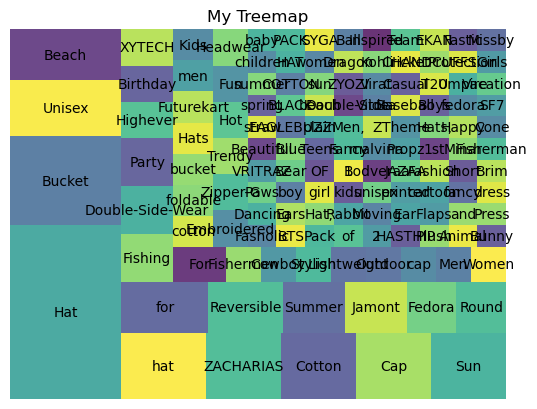

In [53]:
import matplotlib.pyplot as plt
import squarify

# Create a list of strings
mylist = count.keys()

# Assign some random values to the strings
values = count.values()

# Create a dictionary from the list and values
data = dict(zip(mylist, values))

# Sort the dictionary by values
data = dict(sorted(data.items(), key=lambda item: item[1], reverse=True))

# Create a treemap using squarify
squarify.plot(sizes=data.values(), label=data.keys(), alpha=0.8)
# Add labels and title
plt.axis('off')
plt.title("My Treemap")

# Show the plot
plt.show()


Hey its time for visualizations


ZACHARIAS Fishermen Cotton Bucket Hat Cap ZACHARIAS Cotton Cowboy Hat Fasholic BTS Bucket Hat Stylish Cotton Hat Lightweight Outdoor Summer Beach Unisex Hat ZACHARIAS Fedora Hat Pack of 2 HASTHIP Plush Animal Bunny Dancing Ears Hat, Rabbit Moving Ear Flaps and Press Paws VRITRAZ Beautiful straw hat spring summer children baby boy girl kids unisex printed cartoon fancy dress cap Bear Blue Highever Bucket Hat ZACHARIAS Cotton Round Hat EAGLEBUZZ BLACK COTTON HAT PACK OF 1 Jamont Unisex Bucket Hat Beach Sun Hat Fishing Hat Reversible Double-Side-Wear Bodveraa JAZAA Unisex Fashion Bucket Hat Summer Short Brim for Men Women Teens ZACHARIAS Fedora Highever Unisex plain cotton foldable beach hat sun hat bucket hat for women SYGA Fancy Round Cap malvina bucket Jamont Unisex Bucket Hat Beach Sun Hat Fishing Hat Reversible Double-Side-Wear Jamont Unisex Bucket Hat Beach Sun Hat Fishing Hat Reversible Double-Side-Wear Party Propz 1st Birthday Cap Minar hat Jamont Bucket Hat Beach Fisherman Hats f

(-0.5, 1499.5, 1499.5, -0.5)

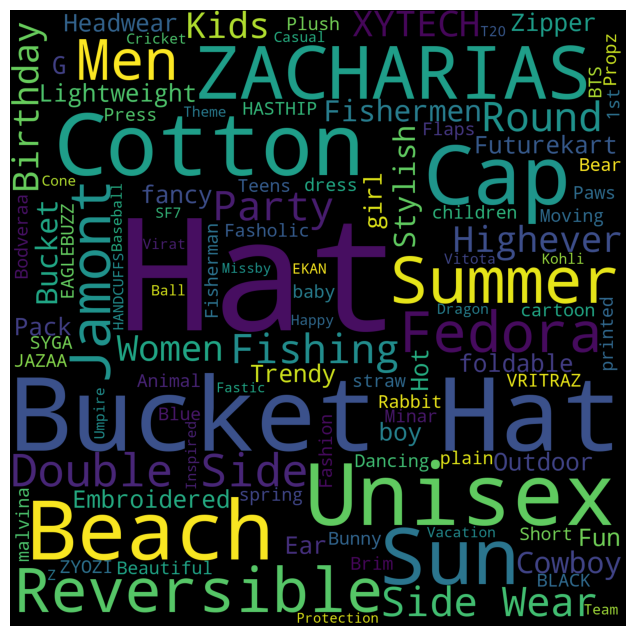

In [54]:
print(' '.join(keyWords))
wordcloud = WordCloud(width = 1500, height = 1500).generate(' '.join(keyWords))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")



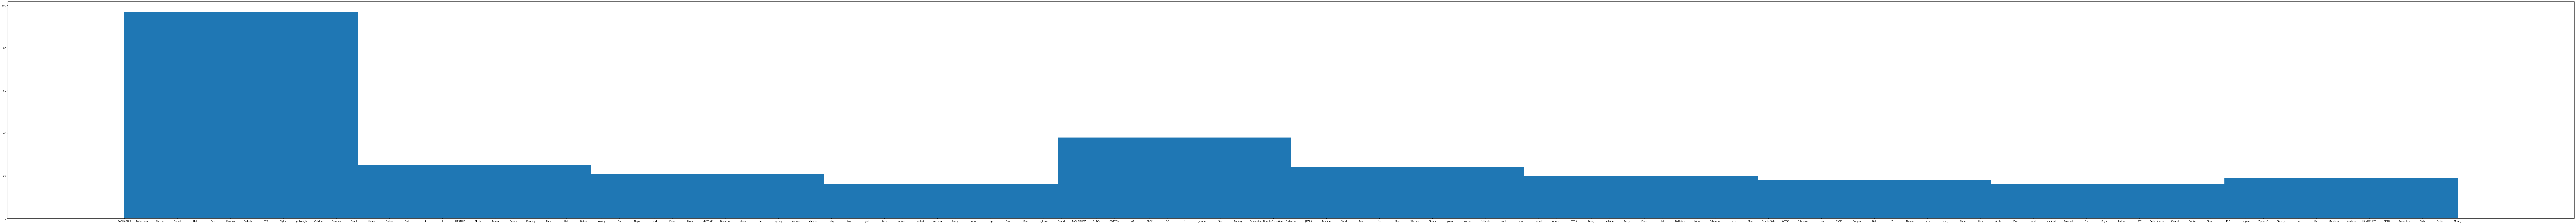

In [55]:
fig, ax = plt.subplots(figsize=(200, 17))
ax.hist(keyWords)

plt.show()


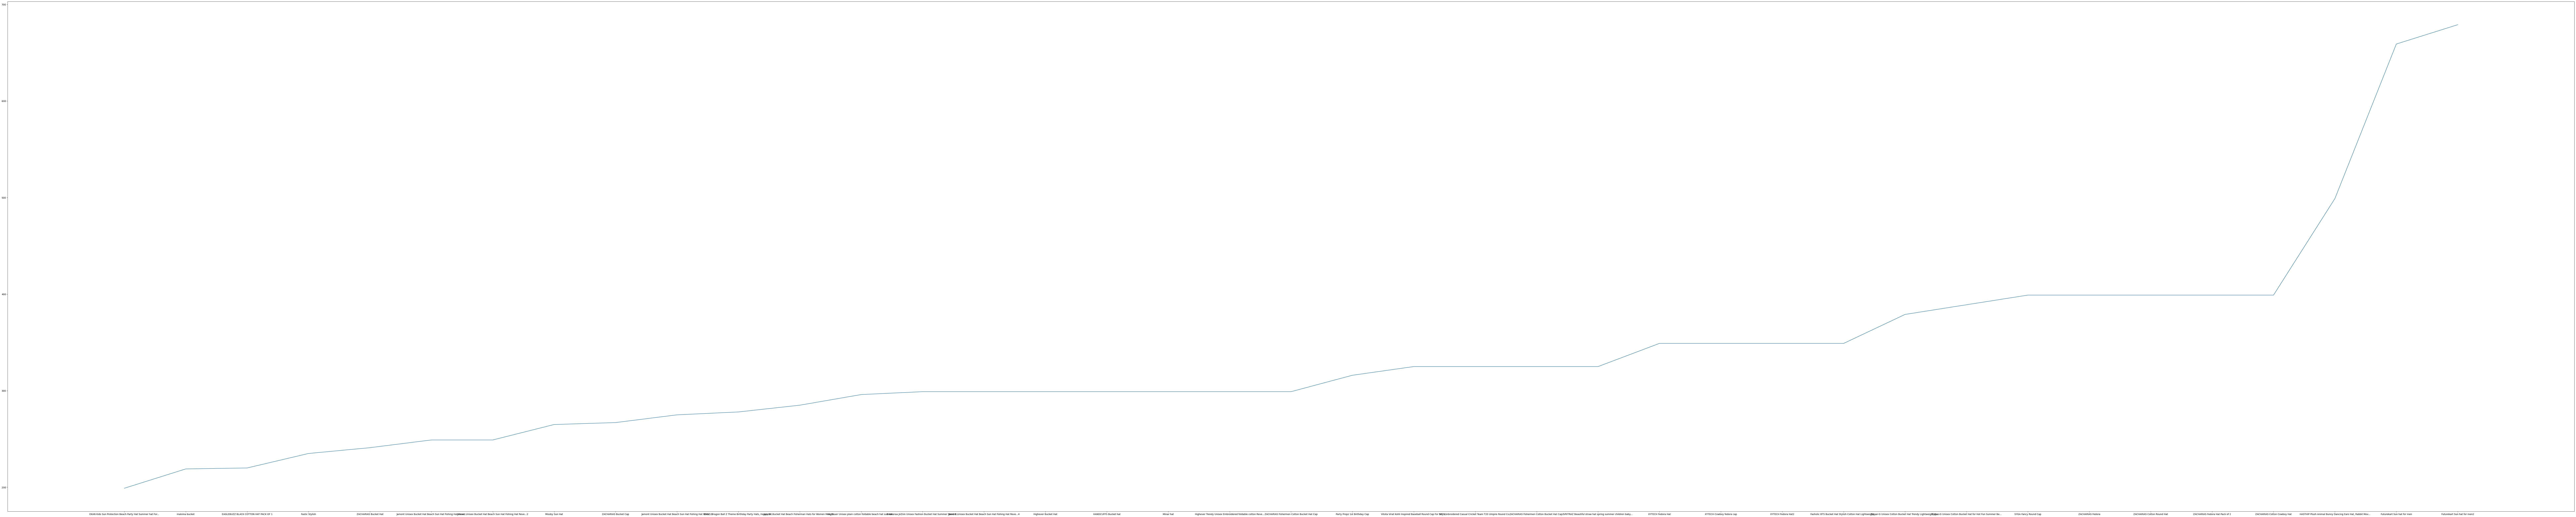

In [56]:
fig, ax = plt.subplots(figsize=(200, 40))
plt.plot(list(table.iloc[:,0]),list(table.iloc[:,2]))



In [57]:
print(set(keyWords))

{'Kids', 'Fedora', 'dress', 'PACK', 'Boys', 'Brim', 'T20', 'Vacation', 'Jamont', 'of', 'Dragon', 'fedora', 'SYGA', 'cartoon', 'plain', 'Girls', 'Reversible', 'girl', 'men', 'Happy', 'Moving', 'Missby', 'Rabbit', 'HASTHIP', 'straw', 'Pack', 'fancy', 'Inspired', 'Ears', 'Bear', 'Futurekart', 'boy', 'Teens', '1st', 'Plush', 'Ball', 'Umpire', 'Theme', 'unisex', 'Zipper-G', 'XYTECH', 'ZYOZI', 'printed', 'beach', 'sun', 'Z', 'Kohli', 'BTS', 'Sun', 'Hats', 'OF', 'HAT', 'women', 'ZACHARIAS', 'Animal', 'Fashion', 'Hat,', 'Men', 'Fancy', 'Vitota', 'Hat', 'Press', 'Embroidered', 'Virat', 'Fastic', 'Beach', 'children', 'COTTON', 'Fisherman', 'summer', 'Highever', 'Propz', 'Outdoor', 'Cone', 'Cotton', 'Round', 'Bunny', 'Summer', 'Birthday', 'Team', 'cotton', 'HANDCUFFS', 'baby', '2', 'EKAN', 'for', 'Lightweight', 'cap', 'Unisex', 'Bucket', 'Fasholic', 'Hats,', 'Paws', 'Men,', 'Double-Side-Wear', 'hat', 'Cowboy', 'foldable', 'malvina', 'Dancing', 'Party', 'Minar', 'Protection', 'Ear', 'Trendy', 'Sho